<a href="https://colab.research.google.com/github/mrifkifauzi/KMeans/blob/main/KMeans_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

**1. Reading & Understanding Data**

In [109]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [110]:
data.shape

(200, 5)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [113]:
df = data.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**2. Exploratory Data Anlysis**

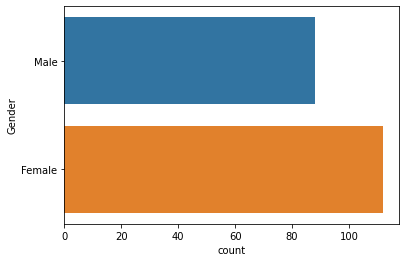

In [114]:
sns.countplot(y='Gender', data=df);

The graph above shows that there are more female customers than male

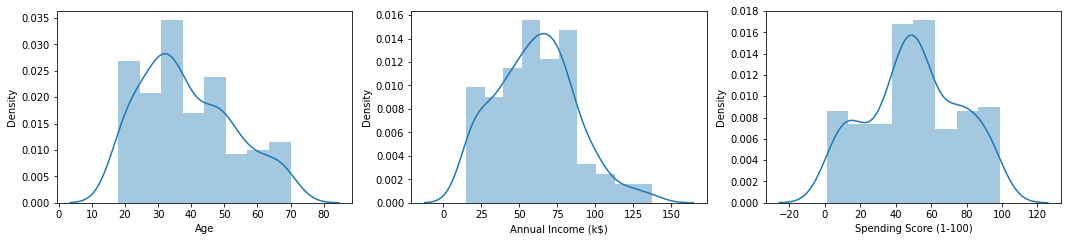

In [115]:
plt.figure(figsize=(18,12))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

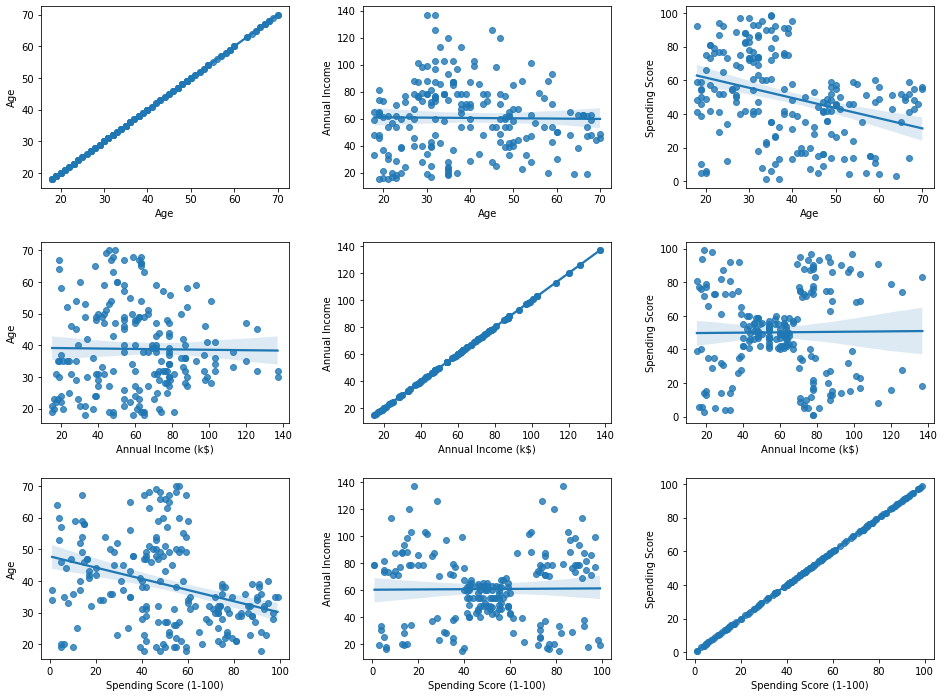

In [116]:
plt.figure(figsize = (16,12))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        sns.regplot(x=x, y=y , data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

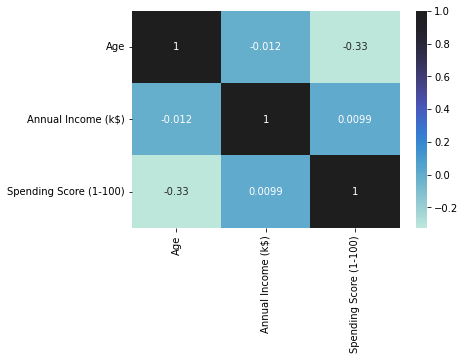

In [117]:
sns.heatmap(df.corr(), center=1, annot=True, fmt='.2g');

based on the heatmap above, there is no strong correlation between variables (the relationship between variables only shows p<0.06)

**3. Clustering**

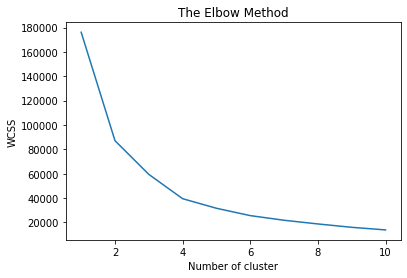

In [128]:
x1 = df[['Age', 'Annual Income (k$)']]

#Elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

best k=4 for clustering Age VS Annual Income

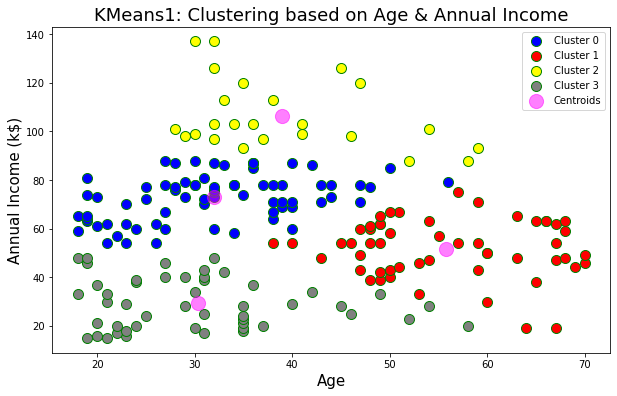

In [178]:
kmeans1 = KMeans(n_clusters = 4, random_state=42).fit(x1)
labels1 = kmeans1.labels_

centroids1 = kmeans1.cluster_centers_

plt.figure(figsize=(10,6))
plt.scatter(x1['Age'][labels1==0], x1['Annual Income (k$)'][labels1==0], label='Cluster 0', c='blue', s=100, edgecolors='green')
plt.scatter(x1['Age'][labels1==1], x1['Annual Income (k$)'][labels1==1], label='Cluster 1', c='red', s=100, edgecolors='green')
plt.scatter(x1['Age'][labels1==2], x1['Annual Income (k$)'][labels1==2], label='Cluster 2', c='yellow', s=100, edgecolors='green')
plt.scatter(x1['Age'][labels1==3], x1['Annual Income (k$)'][labels1==3], label='Cluster 3', c='grey', s=100, edgecolors='green')
plt.scatter(x=centroids1[: , 0], y=centroids1[: , 1], s=200, c='magenta', alpha=0.5, label='Centroids')

plt.legend()
plt.title('KMeans1: Clustering based on Age & Annual Income', size=18)
plt.xlabel('Age', size=15)
plt.ylabel('Annual Income (k$)', size=15)
plt.show()

KMeans1 shows there are 4 clusters of the analysis of the relationship between age and annual income.
1. Cluster 0: customers in their teens to around 50s with medium annual income.
2. Cluster 1: customers aged around 40 - 70 years with lower middle income.
3. Cluster 2: customers with the highest annual income in the late 20s to 60s.
4. Cluster 3: customers with low annual income, age evenly from teenagers to late 50s.

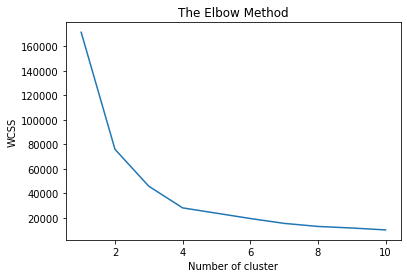

In [138]:
x2 = df[['Age', 'Spending Score (1-100)']]

#Elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

best k = 4 for clustering Age VS Spending Score

<Figure size 720x432 with 0 Axes>

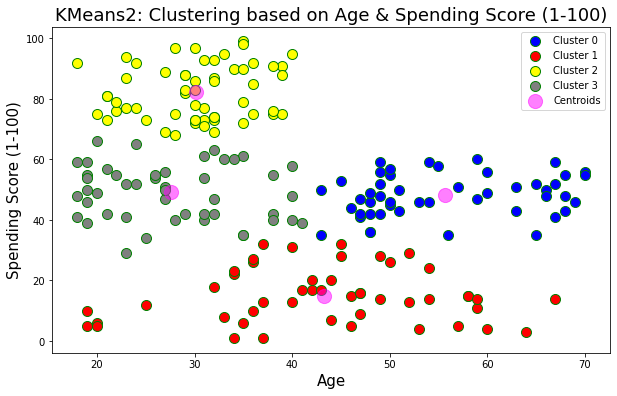

In [179]:
kmeans2 = KMeans(n_clusters = 4, random_state=42).fit(x2)
labels2 = kmeans2.labels_

centroids2 = kmeans2.cluster_centers_

plt.figure(figsize=(10,6))

plt.figure(figsize=(10,6))
plt.scatter(x2['Age'][labels2==0], x2['Spending Score (1-100)'][labels2==0], label='Cluster 0', c='blue', s=100, edgecolors='green')
plt.scatter(x2['Age'][labels2==1], x2['Spending Score (1-100)'][labels2==1], label='Cluster 1', c='red', s=100, edgecolors='green')
plt.scatter(x2['Age'][labels2==2], x2['Spending Score (1-100)'][labels2==2], label='Cluster 2', c='yellow', s=100, edgecolors='green')
plt.scatter(x2['Age'][labels2==3], x2['Spending Score (1-100)'][labels2==3], label='Cluster 3', c='grey', s=100, edgecolors='green')
plt.scatter(x=centroids2[: , 0], y=centroids2[: , 1], s=200, c='magenta', alpha=0.5, label='Centroids')

plt.legend()
plt.title('KMeans2: Clustering based on Age & Spending Score (1-100)', size=18)
plt.xlabel('Age', size=15)
plt.ylabel('Spending Score (1-100)', size=15)
plt.show()

KMeans2 shows there are 4 clusters of the analysis of the relationship between age and annual income.
1. Cluster 0: customers aged 43 - 70 with a medium spending score.
2. Cluster 1: customers of all ages with low spending scores.
3. Cluster 2: customers aged up to around 40 with high spending scores.
4. Cluster 3: customers aged up to 40 years with a medium spending score.

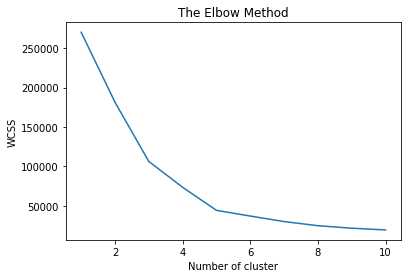

In [180]:
x3 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#Elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

best k=5 for clustering Annual Income VS Spending Score

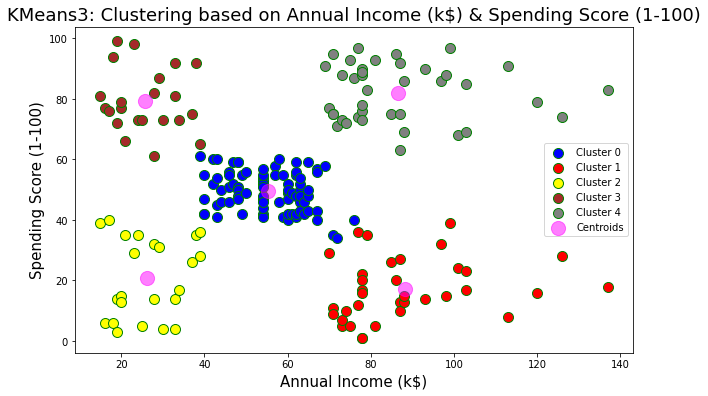

In [183]:
kmeans3 = KMeans(n_clusters = 5, random_state=42).fit(x3)
labels3 = kmeans3.labels_

centroids3 = kmeans3.cluster_centers_

plt.figure(figsize=(10,6))
plt.scatter(x3['Annual Income (k$)'][labels3==0], x3['Spending Score (1-100)'][labels3==0], label='Cluster 0', c='blue', s=100, edgecolors='green')
plt.scatter(x3['Annual Income (k$)'][labels3==1], x3['Spending Score (1-100)'][labels3==1], label='Cluster 1', c='red', s=100, edgecolors='green')
plt.scatter(x3['Annual Income (k$)'][labels3==2], x3['Spending Score (1-100)'][labels3==2], label='Cluster 2', c='yellow', s=100, edgecolors='green')
plt.scatter(x3['Annual Income (k$)'][labels3==3], x3['Spending Score (1-100)'][labels3==3], label='Cluster 3', c='brown', s=100, edgecolors='green')
plt.scatter(x3['Annual Income (k$)'][labels3==4], x3['Spending Score (1-100)'][labels3==4], label='Cluster 4', c='grey', s=100, edgecolors='green')
plt.scatter(x=centroids3[: , 0], y=centroids3[: , 1], s=200, c='magenta', alpha=0.5, label='Centroids')

plt.legend()
plt.title('KMeans3: Clustering based on Annual Income (k$) & Spending Score (1-100)', size=18)
plt.xlabel('Annual Income (k$)', size=15)
plt.ylabel('Spending Score (1-100)', size=15)
plt.show()

KMeans3 shows there are 4 clusters of the analysis of the relationship between age and annual income.
1. Cluster 0: customers with annual income from 40 to the end of 70 k$ and a medium spending score.
2. Cluster 1: high annual income customers and low spending scores.
3. Cluster 2: customers with low annual income and low spending scores.
4. Cluster 3: customers with low annual income but high spending scores.
4. Cluster 4: high annual income customers with high spending scores.

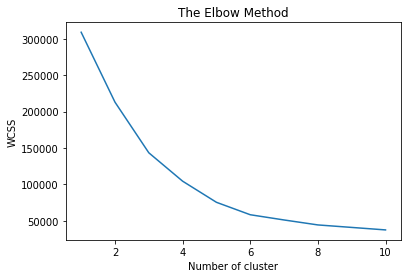

In [184]:
x4 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#Elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(x4)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

best k=6 for Clustering Age VS Annual Income VS Spending Score

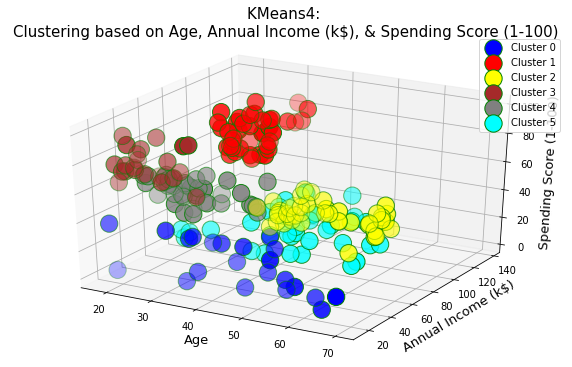

In [192]:
kmeans4 = KMeans(n_clusters = 6, init='k-means++', random_state=42).fit(x4)
labels4 = kmeans4.labels_

centroids4 = kmeans4.cluster_centers_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x4['Age'][labels4==0], x4['Annual Income (k$)'][labels4==0], x4['Spending Score (1-100)'][labels4==0], label='Cluster 0', c='blue', s=300, edgecolors='green')
ax.scatter(x4['Age'][labels4==1], x4['Annual Income (k$)'][labels4==1], x4['Spending Score (1-100)'][labels4==1], label='Cluster 1', c='red', s=300, edgecolors='green')
ax.scatter(x4['Age'][labels4==2], x4['Annual Income (k$)'][labels4==2], x4['Spending Score (1-100)'][labels4==2], label='Cluster 2', c='yellow', s=300, edgecolors='green')
ax.scatter(x4['Age'][labels4==3], x4['Annual Income (k$)'][labels4==3], x4['Spending Score (1-100)'][labels4==3], label='Cluster 3', c='brown', s=300, edgecolors='green')
ax.scatter(x4['Age'][labels4==4], x4['Annual Income (k$)'][labels4==4], x4['Spending Score (1-100)'][labels4==4], label='Cluster 4', c='grey', s=300, edgecolors='green')
ax.scatter(x4['Age'][labels4==5], x4['Annual Income (k$)'][labels4==5], x4['Spending Score (1-100)'][labels4==5], label='Cluster 5', c='cyan', s=300, edgecolors='green')

plt.title('KMeans4: \nClustering based on Age, Annual Income (k$), & Spending Score (1-100)\n', size=15)
plt.legend()
plt.xlabel('Age', size=13)
plt.ylabel('Annual Income (k$)', size=13)
ax.set_zlabel('Spending Score (1-100)', size=13)
plt.show()

KMeans2 shows there are 4 clusters of the analysis of the relationship between age and annual income.
1. Cluster 0: customers of all ages who have low annual income and low spending scores.
2. Cluster 1: customers with teenagers up to about 30 years old, have high annual income and high spending scores.
3. Cluster 2: customers aged 20 to around 50 years, have high annual income but low spending score.
4. Cluster 3: customers with teenagers up to 30 years old who have a lower-middle annual income but a high spending score.
5. Cluster 4: customers aged around 20-40 years who have a medium annual income and a medium spending score.
6. Cluster 5: customers with teenagers up to the end of 50 years who have high annual income but very low spending scores.